# INSIGHT 심화세션 사전과제
## 04. 딥러닝 ③ Focus on TRANSFORMER

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> Self-Attention </span>

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> Query, Key, Value </span>

> **쿼리(Query), 키(Key), 밸류(Value)**

→ 모델이 수많은 정보 안에서 **가장 관련 있는 정보를 효과적으로 찾아내기(Attention)** 위해 3가지 역할로 분할!

**Q : Query**

쿼리는 말 그대로 **'질문'** 또는 **'요청'**으로, 지금 당장 내가 알고 싶거나, 초점을 맞추고 있는 대상

**K : Key**

키는 검색 대상이 되는 **모든 정보들이 달고 있는 '이름표' 또는 '색인'**. 쿼리는 이 키들과 자신을 비교하며 얼마나 관련이 있는지 확인한다!

**V : Value**

밸류는 키와 한 쌍으로 묶여 있는 **'실제 내용물'**. 쿼리와 키의 관련도 계산이 끝나고, 가장 관련성이 높다고 판단된 키가 선택되면, 모델은 그 키에 해당하는 밸류를 가져와 사용

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 기존 Cross-Attention vs. Self-Attention </span>

| 구분 | 기존 어텐션 (Cross-Attention) | 셀프 어텐션 (Self-Attention) |
| --- | --- | --- |
| 핵심 아이디어 | 번역할 문장을 슬쩍슬쩍 보면서 단어를 생성 | 문장 자체를 뜯어보며 내부 관계를 파악 |
| 작동 방식 | 하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만들어내는 메커니즘 | 한 문장 내 모든 단어끼리 서로의 관계를 계산 |
| 참조 대상 | 서로 다른 시퀀스 (인코더 ↔ 디코더) | 동일한 시퀀스 (문장 내부 ↔ 문장 내부) |
| 주요 목적 | 인코더-디코더 연결, 정보 병목 현상 해소 | 시퀀스 내부의 문맥 및 의존 관계 파악 |
| 기반 아키텍처 | RNN (LSTM, GRU) | 트랜스포머 (Attention Only) |
| 병렬 처리 | 불가능 (순차적)  | 가능  |

> **기존 Attention in Seq2Seq (Cross-Attention)**   

: 번역할 문장을 슬쩍슬쩍 보면서 단어를 생성.  
→ Query와  Key - Value쌍이 **서로 다른 시퀀스**에서 출력

> **Self-Attention**   

: 문장 **자체를 뜯어보며** 내부의 관계를 파악.  
→ Query와  Key - Value쌍이 **같은 시퀀스**에서 출력

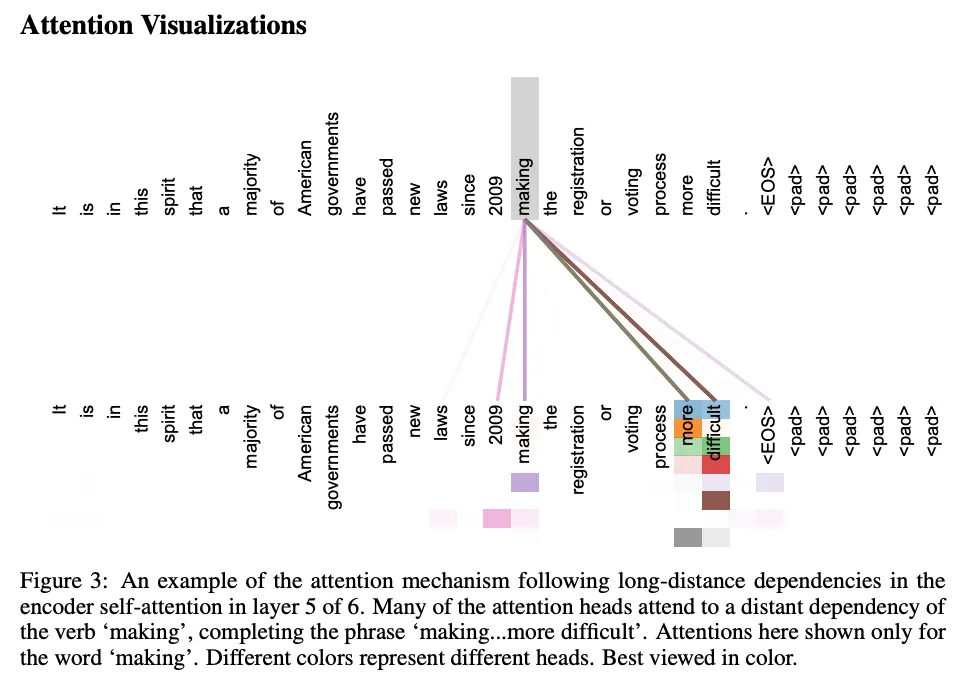

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> Scaled Dot-Product Attention </span>

> Dot-Product Attention

- Dot-Product Attention은 Attention Score를 계산하는 가장 기본적인 방법 중 하나
- 쿼리(Query)와 키(Key) 벡터를 내적(Dot Product)하여 유사도를 구함

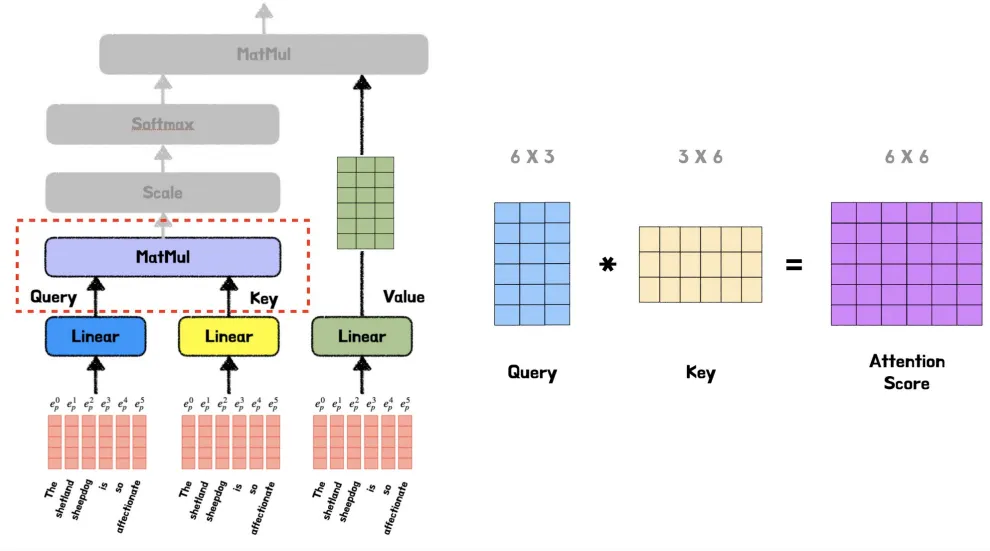

> Scaled Dot-Product Attention

- 기존의 Dot-Product Attention의 문제를 해결하고자, "Attention is All You Need"의 저자들이 제안한 현재 트랜스포머 방식의 표준

→ **Transformer의 “어텐션 계산 공식” 자체를 의미!**

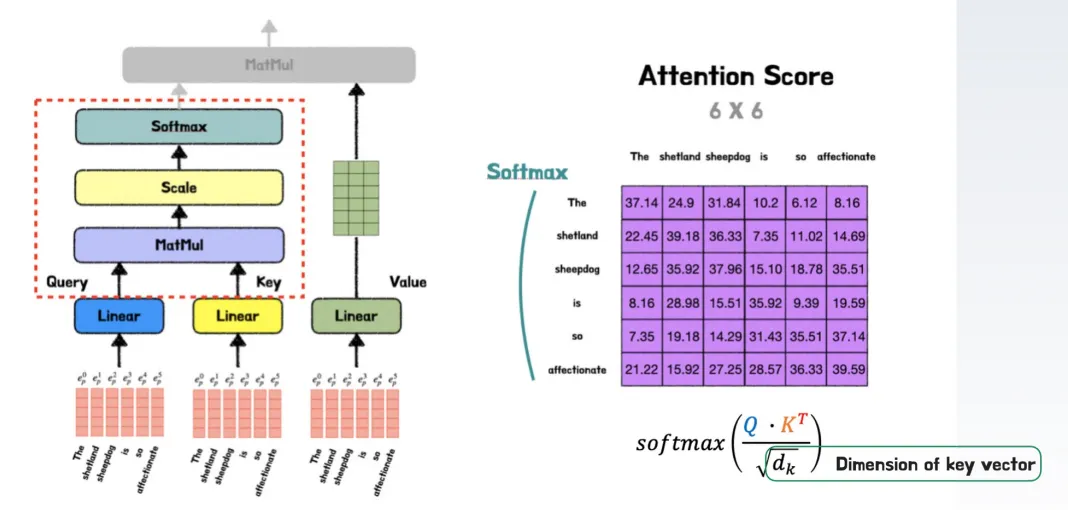

**어떻게 기존의 Dot-Product Attention의 문제를 해결했는가?**

→ Dot-Product Attention 과정에서 내적을 진행한 후, 값의 크기를 맞추는 **스케일링** 과정을 추가!

- 한 번의 나눗셈으로, 계산된 내적 값이 과도하게 증가하는 것을 방지하여 안정적인 분포를 형성하고, 이는 Softmax 함수가 안정적으로 학습을 진행할 수 있도록 함

**Scaled Dot-Product Attention 계산의 결과로 얻어지는 벡터**

- **Cross-Attention** : 현재 생성 중인 단어가, 입력 문장에서 어떤 단어들에 집중해야 하는지를 반영한 **Context Vector**
- **Self-Attention** : 문장 내 다른 단어들과의 관계를 반영한 **문맥적 표현**

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> Multi-Head Attention </span>

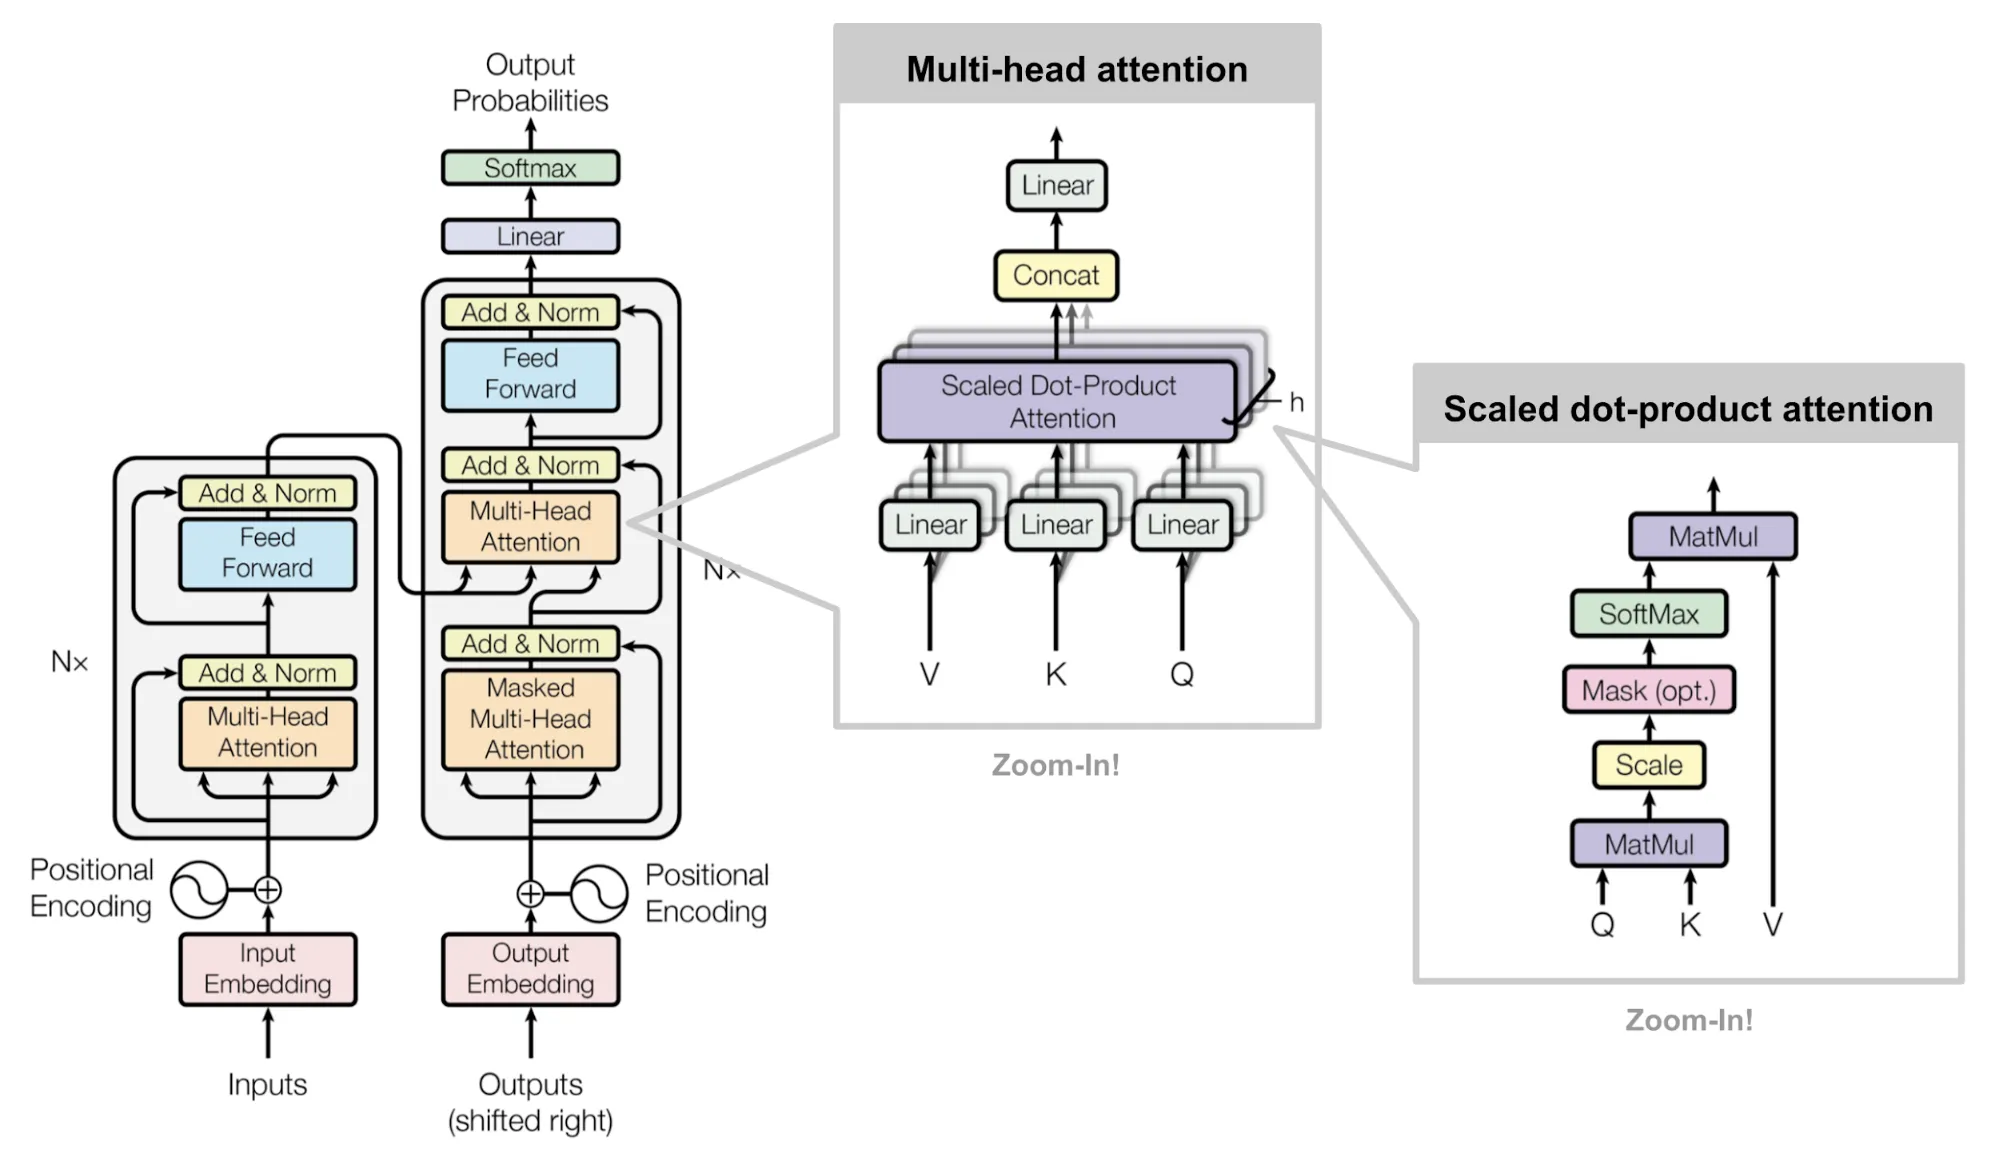

> **Single-Head Attention**
> 
- 문장 내 단어들 간의 관계를 파악하기 위해 하나의 가중치 행렬$(W^Q, W^K, W^V)$만을 학습하고 번역에 사용
- 작동 방식
    - 512차원의 입력 벡터 → 이 벡터를 위한 어탠션 가중치 분포 계산 → 가중합 하여 새로운 512차원의 벡터를 출력
- 한계
    - 하나의 어텐션 분포 안에서 각 단어 간 문법적인 관계, 의미적인 관계, 위치 관계 등 모든 종류의 정보를 한 번에 담아 가중 평균을 구해버리기 때문에, 결국 각 단어 간의 중요한 관계를 놓쳐버릴 수 있음

> **Multi-Head Attention**
> 
- Multi-Head Attention은 이와 다르게, 한 단어와 다른 단어 간의 관계를 여러 차원으로 나누어 **병렬로** 학습   
- *Attention is all you need* 에서는 512차원의 입력 벡터를 64차원씩 8개의 벡터로 나누고, **Attention 스코어를 병렬로 여러 번 계산** 하는데, 이 과정이 Multi-Head Attention임!

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> Multi-Head Attention 작동 방식 </span>

**1. 분할 (Projection) - 8명의 헤드에 단어 벡터 할당**

가장 먼저, 'love'라는 단어를 나타내는 **하나의 512차원 벡터**가 들어옵니다. 멀티-헤드 어텐션은 이 큰 벡터를 통째로 처리하지 않고, 이 벡터를 8개의 작은 벡터 그룹(Q, K, V)으로 투영(projection) 하여 **8개의 서로 다른 관점**으로 나눕니다.

<aside>

- **입력**: `love_vector` (크기: 1×512)

이 입력 벡터에 8세트의 서로 다른 가중치 행렬을 곱합니다.

- `Query_1` = `love_vector` × $W_1^Q$ (결과 크기: 1×64)
- `Key_1` = `love_vector` ×$W_1^K$(결과 크기: 1×64)
- `Value_1` = `love_vector` × $W_1^V$(결과 크기: 1×64)
    
    …
    
- `Query_8` = `love_vector` ×$W_8^Q$ (결과 크기: 1×64)
- `Key_8` = `love_vector` ×$W_8^K$ (결과 크기: 1×64)
- `Value_8` = `love_vector` ×$W_8^V$ (결과 크기: 1×64)
</aside>

**2. 병렬 어텐션 계산 - 각 헤드들이 각자 분석 수행**

이제 8개의 헤드는 **서로에게 전혀 간섭하지 않고, 병렬로** Scaled Dot-Product Attention을 계산합니다. 

**헤드 1**에서 일어나는 일을 자세히 뜯어보겠습니다.

<aside>

1. **점수 계산 (Score)**: `love`의 `Query_1` 벡터를 문장 내 모든 단어("I", "love", "you")의 `Key_1` 벡터와 내적하여 관련성 점수를 계산합니다.
    - `Score_1` = `Query_1` ⋅ (`Key_I_1`, `Key_love_1`, `Key_you_1`)
        - 가독성을 위해 Transpose는 생략했습니다.
2. **크기 조절 (Scale)**: 계산된 점수들을 각 헤드 차원의 제곱근(8)으로 나누어 줍니다.
    
    [](data:image/svg+xml;utf8,<svg xmlns="http://www.w3.org/2000/svg" width="400em" height="1.08em" viewBox="0 0 400000 1080" preserveAspectRatio="xMinYMin slice"><path d="M95,702
    c-2.7,0,-7.17,-2.7,-13.5,-8c-5.8,-5.3,-9.5,-10,-9.5,-14
    c0,-2,0.3,-3.3,1,-4c1.3,-2.7,23.83,-20.7,67.5,-54
    c44.2,-33.3,65.8,-50.3,66.5,-51c1.3,-1.3,3,-2,5,-2c4.7,0,8.7,3.3,12,10
    s173,378,173,378c0.7,0,35.3,-71,104,-213c68.7,-142,137.5,-285,206.5,-429
    c69,-144,104.5,-217.7,106.5,-221
    l0 -0
    c5.3,-9.3,12,-14,20,-14
    H400000v40H845.2724
    s-225.272,467,-225.272,467s-235,486,-235,486c-2.7,4.7,-9,7,-19,7
    c-6,0,-10,-1,-12,-3s-194,-422,-194,-422s-65,47,-65,47z
    M834 80h400000v40h-400000z"></path></svg>)
    
3. **가중치 변환 (Softmax)**: 조절된 점수들에 Softmax 함수를 적용하여 총합이 1인 어텐션 가중치(`Attention_Weights_1`)를 만듭니다. 이 가중치는 헤드 1의 관점에서 'love'가 다른 단어들에 얼마나 집중해야 하는지를 나타냅니다.
4. **가중합 (Weighted Sum)**: 이 가중치를 문장 내 모든 단어의 **`Value_1` 벡터**에 곱한 뒤 모두 더합니다.
    - `Attention_Output_1` = `Attention_Weights_1` × (`Value_I_1`, `Value_love_1`, `Value_you_1`)
</aside>

**3. 결합 및 최종 투영 - 전문가들의 분석 결과 취합**

이제 8명의 헤드 각자 내놓은 8개의 분석 결과(`Attention_Output_1` ~ `Attention_Output_8`)를 하나로 합칠 차례입니다.

<aside>

1. **결합 (Concatenate)**: 8개의 64차원 결과 벡터들을 순서대로 이어 붙여 **하나의 거대한 512차원 벡터**(8×64=512)를 만듭니다.
    - `Concat_Output` = Concat(`Attention_Output_1`, `Attention_Output_2`, ..., `Attention_Output_8`)
2. **최종 투영 (Final Projection)**: 이 512차원 벡터는 아직 각 헤드의 분석 결과가 단순히 나열된 상태입니다. 이 정보들을 잘 융합하고 최종적으로 정리하기 위해, 또 다른 가중치 행렬을 곱해줍니다.
    - `Final_Output` = `Concat_Output` × $W^O$
</aside>

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> Transformer 전체 아키텍처 </span>

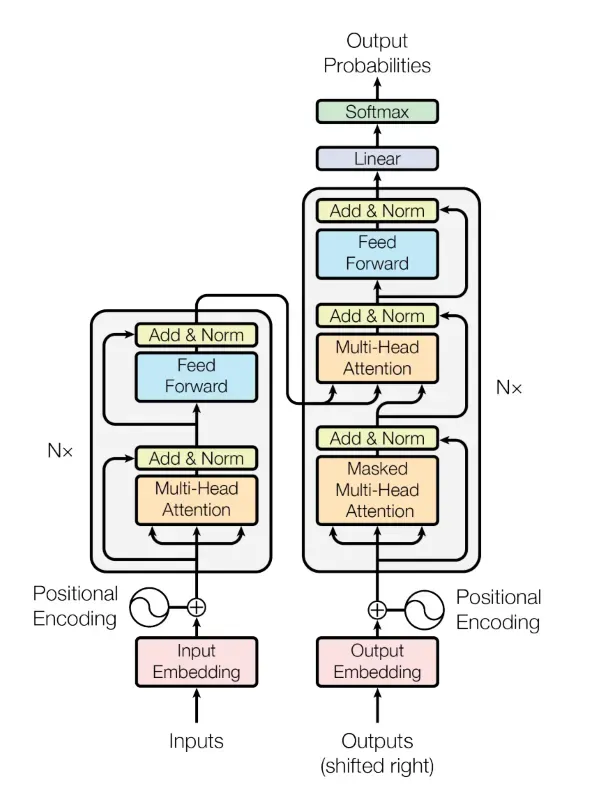

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 트랜스포머의 전처리 단계 </span>

<span style="color:#f993c0;"> 1. 토큰화 </span>

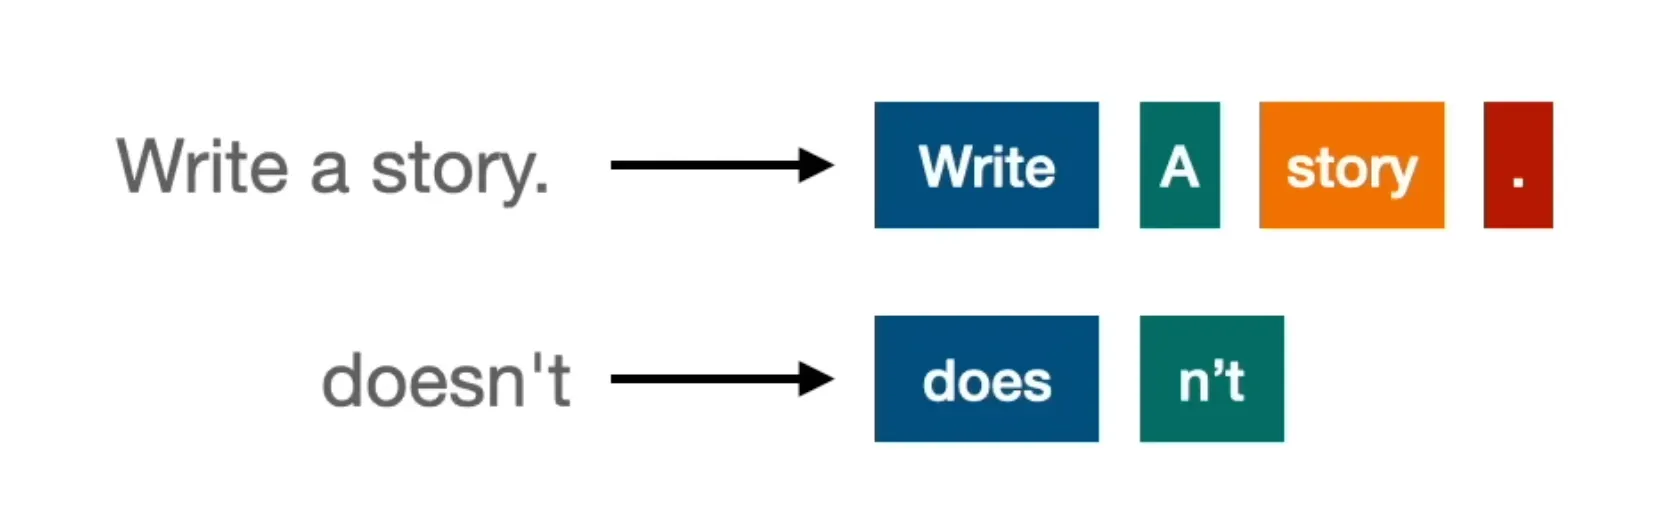

토큰화는 입력 텍스트를 모델이 처리할 수 있는 단위(tokens)로 나누는 첫 번째 단계

> **토큰화 방법**
> 
> 1. 대부분의 경우 각 토큰은 하나의 **단어**에 해당됩니다. ex) `Write`, `A`, `Story` 
> 2. 문장 부호 역시 별도의 토큰을 가집니다. ex) `.`, `!`
> 3. 일부 단어는 하나 이상의 토큰으로 나뉠 수 있습니다. ex) `doesn’t` → `does`, `n’t`

<span style="color:#f993c0;"> 2. 임베딩 </span>

토큰화된 각 단위(토큰)는 임베딩 단계에서 숫자의 벡터로 변환됨

> **임베딩의 구조**
> 
> 
> 임베딩은 많은 숫자로 이루어진 긴 벡터로 단어를 나타냅니다. 이 벡터의 길이가 바로 벡터의 차원이 됩니다.
>

임베딩의 가장 중요한 원리는 단어의 의미를 **공간적으로 표현**하는 것

> **유사한 단어는 유사한 숫자**
> 
> 
> 의미적으로 유사한 단어들은 임베딩 공간에서 유사한 숫자(좌표)로 변환되어야 합니다.
>

이러한 유사성 덕분에, 임베딩은 단어의 문맥을 포착하고 단어 간의 관계를 파악하는 어텐션 메커니즘이 작동하기 전에 단어에 대한 기본적인 속성을 제공!

<span style="color:#f993c0;"> 3. Positional Encoding </span>

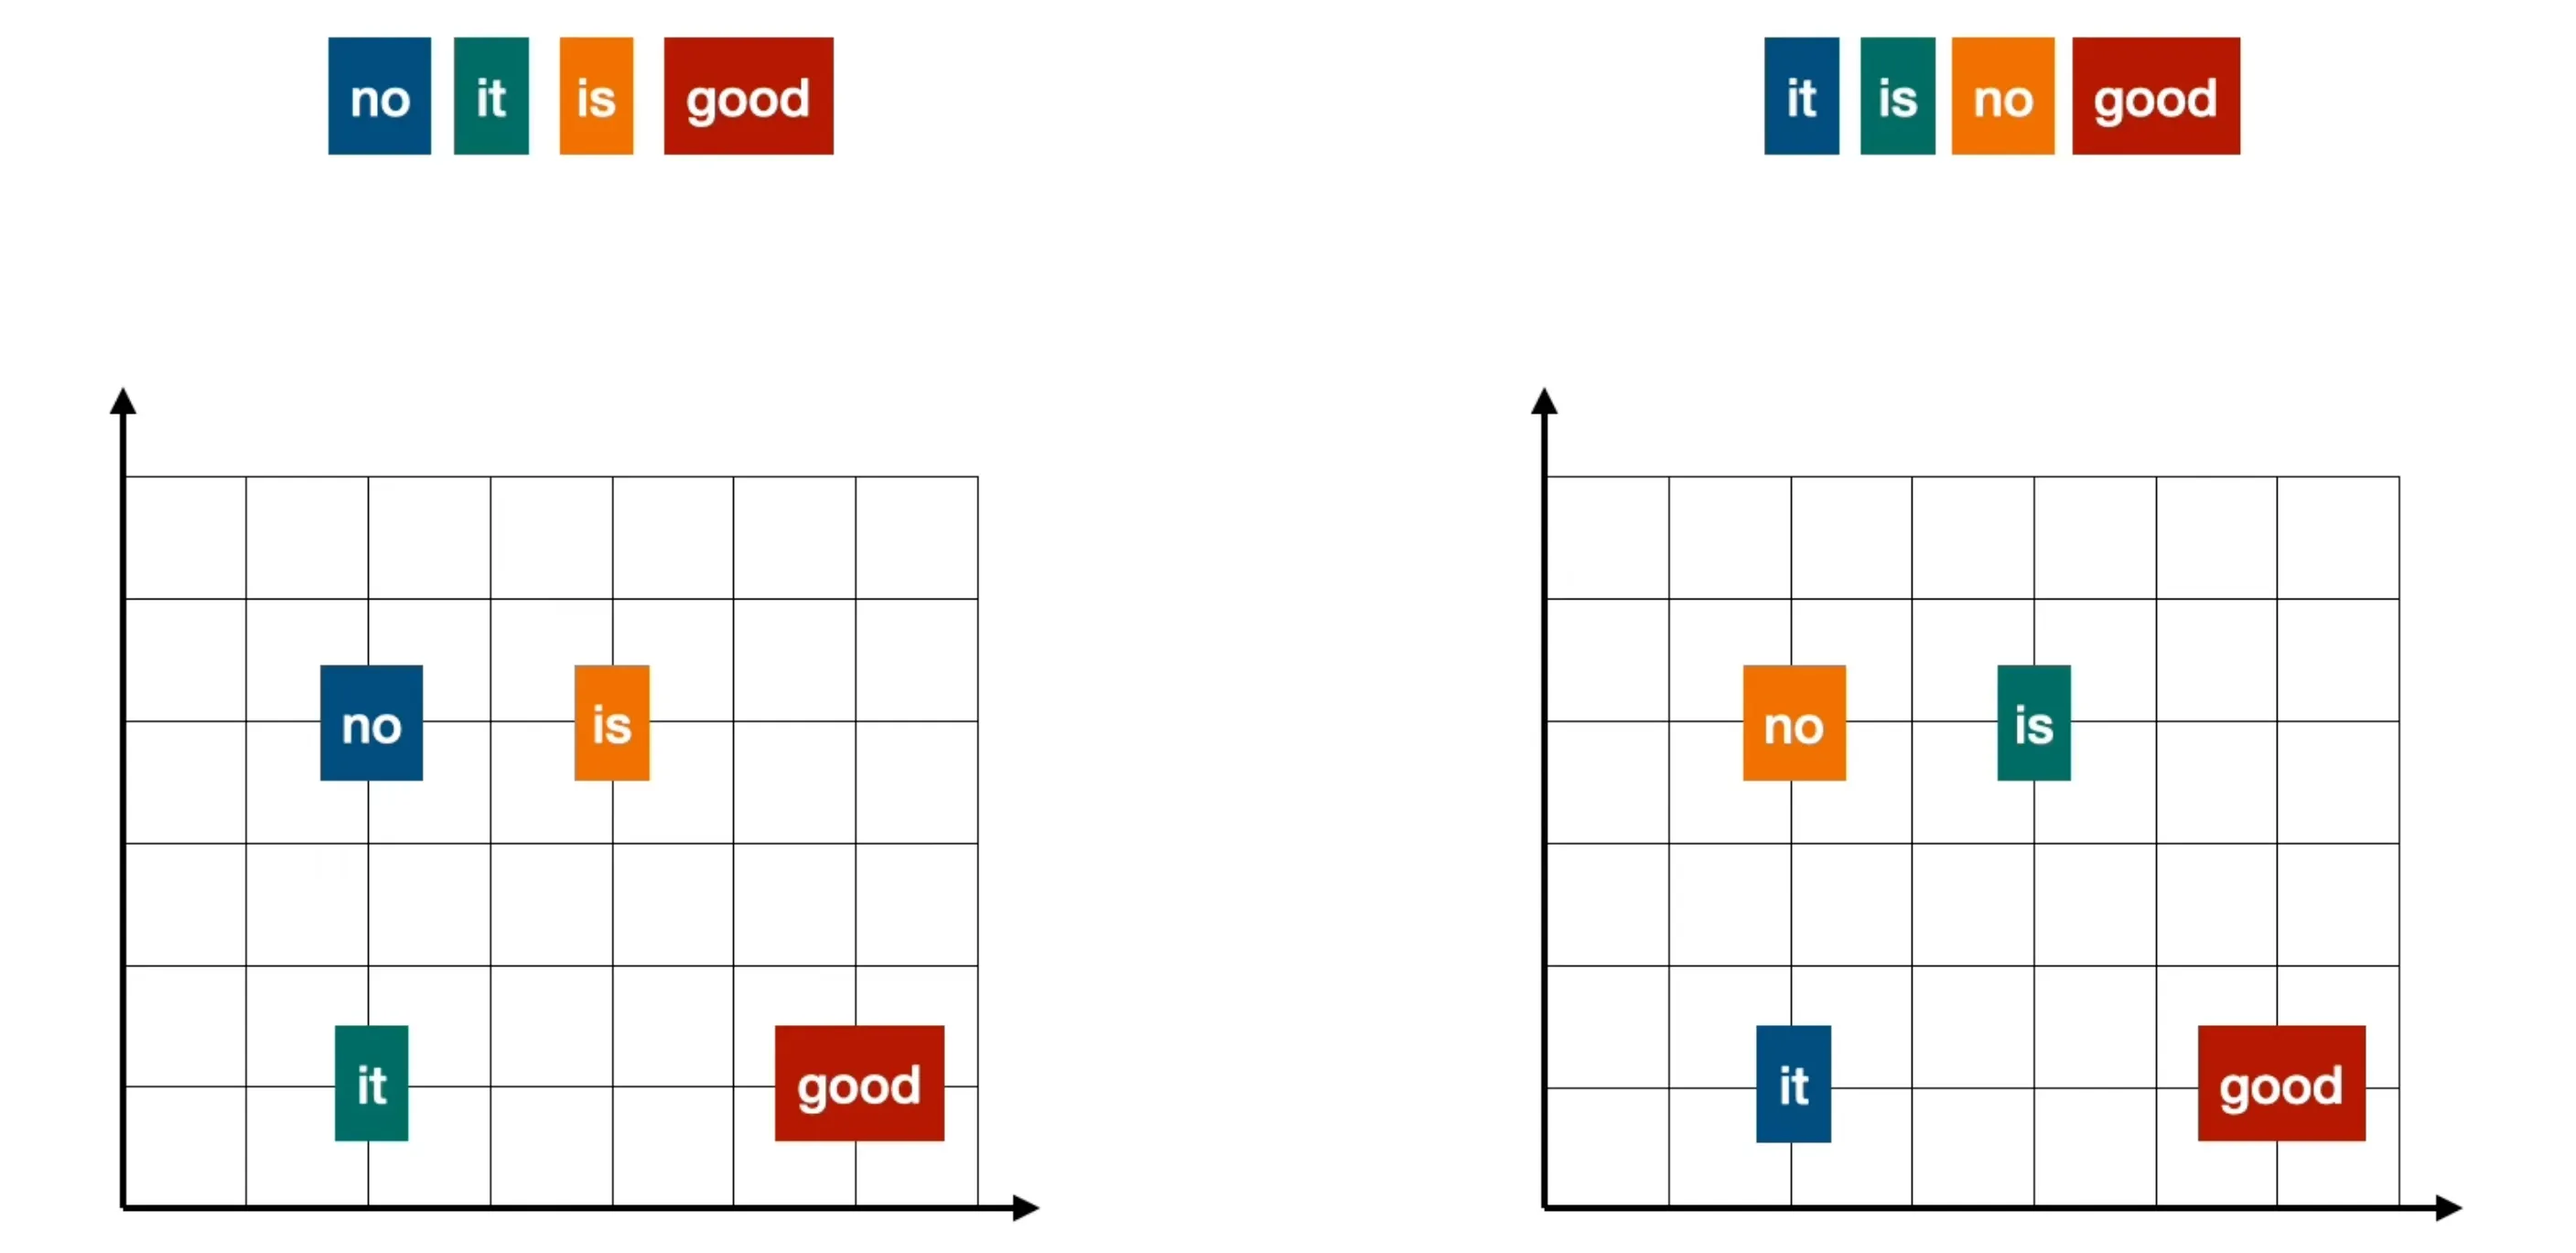

단어들의 순서 정보를 임베딩 벡터에 추가하는 단계

> 단어들은 문법적 측면이나, 문맥을 파악하기 위해서나 등장한 순서가 매우 중요하기 때문에, 이 순서 정보, 즉 위치 정보를 제공하기 위해 positional encoding을 사용

각 단어의 임베딩 좌표에 **일관된 순서(consistent sequence)**를 따르는 다른 숫자를 추가하여 순서 정보를 기록

→ 이 과정을 통해, 같은 단어라도 **문장에서 차지하는 위치**가 다르면 최종적으로 **다른 좌표**(수정된 임베딩)를 가지게 되며, 이는 모델이 순서를 학습할 수 있도록 도움

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 트랜스포머의 인코더와 디코더 </span>

<span style="color:#f993c0;"> 인코더 </span>

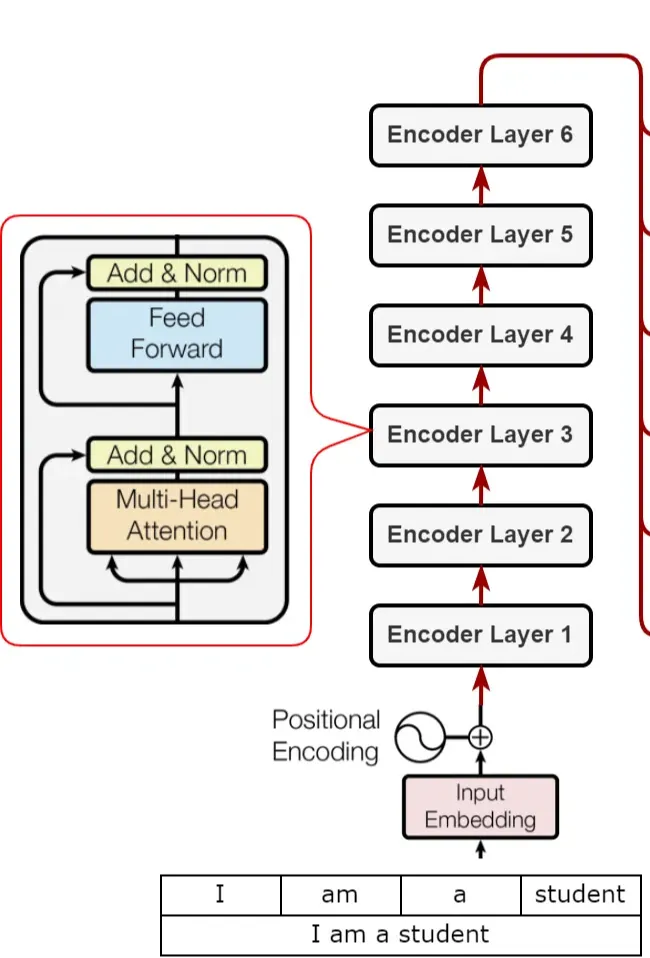

트랜스포머의 Encoder는 입력 문장을 이해하고 요약된 의미 벡터로 변환하는 역할!!

> 인코더 레이어의 구성

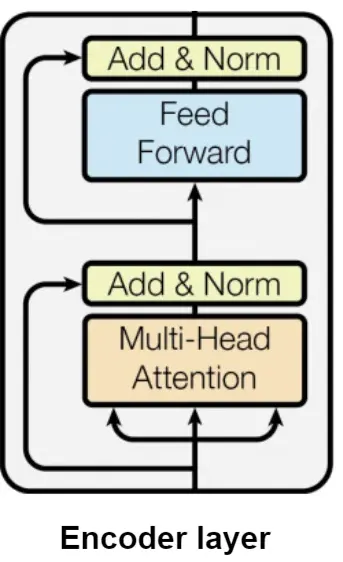

1. **Multi-Head Attention**
2. **Feed-Forward**
    : 입력 벡터의 차원을 확장하고 비선형 변환(ex: ReLU)을 적용하여 새로운 표현을 생성하는 신경망 구조

<span style="color:#f993c0;"> 디코더 </span>

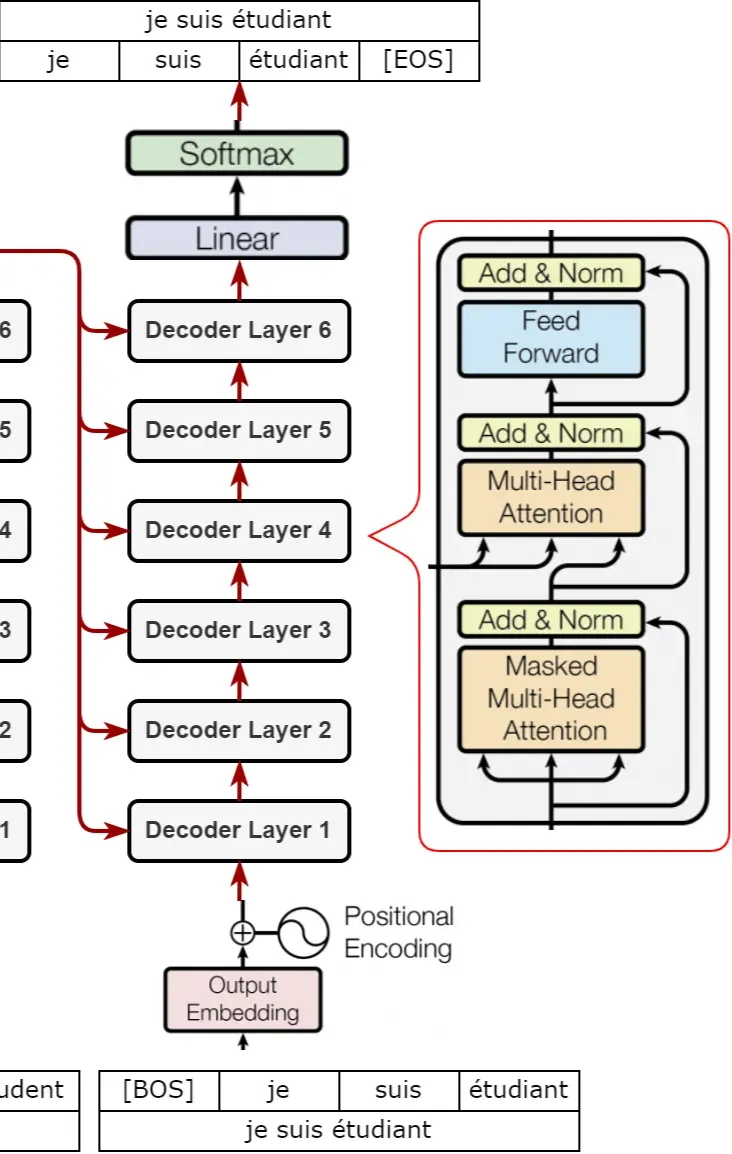

트랜스포머의 Decoder는 Encoder가 분석한 입력 문장의 의미 벡터를 받아서 출력 문장을 순차적으로 생성하는 역할

> 디코더 레이어의 구성

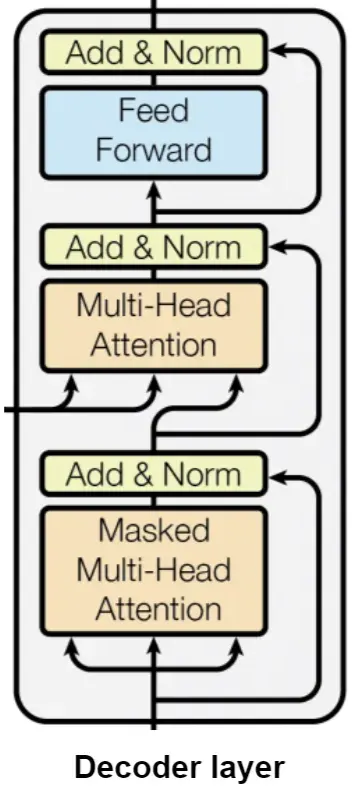

1. **Masked Multi-Head Attention**: 미래 시점의 단어 정보를 참고하지 못하도록 마스크(mask)를 적용하는 어텐션 메커니즘
2. **Encoder-Decoder Multi-Head Attention(Cross-Attention)**: 디코더가 인코더의 출력(Context)을 참고하면서 현재 생성 중인 단어를 입력 문장의 의미와 연결하는 과정
3. **Feed-Forward Layer**